<a href="https://colab.research.google.com/github/fdmy2713-dotcom/ADS1/blob/main/ADS1_Tutorial_2_1_Reading_Files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science 1- Tutorial 2-1

## Reading Files into Python
There are many ways of reading files in python and many different types of file types you may be familiar with.
We will focus in this module on csv (comma separated values) files, as this is one of the most commonly used file types across many fields. Data Handling and Visualisation will present further, more awkward data types.
The first thing to do is to make sure your path to the file is always correct.
The easiest way of doing this, especially for small data files, is to ensure the file is in the same directory as your python script.
Let's look at some different methods of reading a simple csv.

In [25]:
# 🚀 Run this cell first (libraries + sample data helpers)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1) Download the **countries.csv** file from Blackboard. Upload the file into Google Colab folder

In [2]:
#1) Manually (inbuilt python methods)
with open('countries_top10.csv', 'r') as f:
    data = []
    for line in f.readlines():
        linelist = line.rstrip('\n').split(',')
        for i, value in enumerate(linelist):
            try:
                value = float(value)
                if value.is_integer():
                    value = int(value)
            except ValueError:
                continue
            linelist[i] = value
        data.append(linelist)
print(data)
print(type(data))
print(type(data[0]))
print(type(data[1][1]))

[['Country', 'Population', 'Area', 'GDP'], ['Bangladesh', 160996000, 147570, 195100000000], ['Brasil', 207848000, 8547404, 1775000000000], ['China', 1379113000, 9572419, 10866000000000], ['India', 1311051000, 3287263, 2047000000000], ['Indonesia', 257564000, 1912988, 861900000000], ['Mexico', 127017000, 1359162, 1144000000000], ['Nigeria', 182202000, 923768, 481100000000], ['Pakistan', 188925000, 796095, 270000000000], ['Russia', 144097000, 17075400, 1326000000000], ['USA', 321419000, 9809155, 17947000000000]]
<class 'list'>
<class 'list'>
<class 'int'>


2) Use Python **csv** libray

import csv into Python

In [3]:
# CSV method (standard library)
import csv
with open('countries_top10.csv', 'r') as f:
    csvreader = csv.reader(f)
    data = []
    for row in csvreader:
        for i, value in enumerate(row):
            try:
                value = float(value)
                if value.is_integer():
                    value = int(value)
            except ValueError:
                continue
            row[i] = value
        data.append(row)
print(data)
print(type(data))
print(type(data[0]))
print(type(data[1][1]))

[['Country', 'Population', 'Area', 'GDP'], ['Bangladesh', 160996000, 147570, 195100000000], ['Brasil', 207848000, 8547404, 1775000000000], ['China', 1379113000, 9572419, 10866000000000], ['India', 1311051000, 3287263, 2047000000000], ['Indonesia', 257564000, 1912988, 861900000000], ['Mexico', 127017000, 1359162, 1144000000000], ['Nigeria', 182202000, 923768, 481100000000], ['Pakistan', 188925000, 796095, 270000000000], ['Russia', 144097000, 17075400, 1326000000000], ['USA', 321419000, 9809155, 17947000000000]]
<class 'list'>
<class 'list'>
<class 'int'>


3) Use Panda Library method
import panda library

In [4]:
# pandas
import pandas as pd
df = pd.read_csv('countries_top10.csv')
print(df)
print(type(df))
print(type(df.iloc[0]))
print(type(df.iloc[1, 1]))
# or preferably
print(df['Population'][1])

      Country  Population      Area             GDP
0  Bangladesh   160996000    147570    195100000000
1      Brasil   207848000   8547404   1775000000000
2       China  1379113000   9572419  10866000000000
3       India  1311051000   3287263   2047000000000
4   Indonesia   257564000   1912988    861900000000
5      Mexico   127017000   1359162   1144000000000
6     Nigeria   182202000    923768    481100000000
7    Pakistan   188925000    796095    270000000000
8      Russia   144097000  17075400   1326000000000
9         USA   321419000   9809155  17947000000000
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'numpy.int64'>
207848000


4) Use Numpy library
Import numpy library

In [5]:
# numpy method(s)
import numpy as np
data = np.genfromtxt('countries_top10.csv', dtype=[('Country', 'S10'), ('Population', int), ('Area', int), ('GDP', int)],
                     delimiter=',', skip_header=1)
# or data = np.loadtxt -- if you know there is no missing data
print(data)
print(type(data))
print(type(data[0]))
print(type(data[1][1]))

[(b'Bangladesh',  160996000,   147570,   195100000000)
 (b'Brasil',  207848000,  8547404,  1775000000000)
 (b'China', 1379113000,  9572419, 10866000000000)
 (b'India', 1311051000,  3287263,  2047000000000)
 (b'Indonesia',  257564000,  1912988,   861900000000)
 (b'Mexico',  127017000,  1359162,  1144000000000)
 (b'Nigeria',  182202000,   923768,   481100000000)
 (b'Pakistan',  188925000,   796095,   270000000000)
 (b'Russia',  144097000, 17075400,  1326000000000)
 (b'USA',  321419000,  9809155, 17947000000000)]
<class 'numpy.ndarray'>
<class 'numpy.void'>
<class 'numpy.int64'>


So let's use the pandas method.
What about making more data?
Let's also reindex so the country is the index.

In [6]:
df = pd.read_csv('countries_top10.csv', index_col='Country')
df['GDP/head'] = df['GDP'] / df['Population']
df['Pop/km2'] = df['Population'] / df['Area']
df.head()

,Population,Area,GDP,GDP/head,Pop/km2
Country,,,,,
Bangladesh,160996000,147570,195100000000,1211.831350,1090.980552
Brasil,207848000,8547404,1775000000000,8539.894538,24.317091
China,1379113000,9572419,10866000000000,7878.977285,144.071525
India,1311051000,3287263,2047000000000,1561.342770,398.827535
Indonesia,257564000,1912988,861900000000,3346.352751,134.639632


Note the use of df.head.
One caution is when in a jupyter notebook, be aware if you're modifying code and have already modified the dataframe, certain commands when re-run may break, e.g. if I had used set_index instead.

# Question 1
## Part 1
Download the file from BB, **GDP_2015dollars.csv**, set the **year as the index** and **plot the time series of the 4 countries GDP change, with a log scale (plt.yscale('log')).**
Note after setting the year as the index, you can access that data as df_gdp.index.
Another hint, you can use a for loop across df_gdp.columns to save repeating similar lines of code.

In [10]:
# Type in the mission commands in ' '
# create a new dataframe df_gdp
df_gdp = pd.read_csv('GDP_2015dollars.csv', index_col=0)
df_gdp.head()

,China,Germany,Japan,United States
Year,,,,
1970,2.320617e+11,1.398222e+12,1.460289e+12,5.183548e+12
1971,2.484453e+11,1.442024e+12,1.528908e+12,5.354261e+12
1972,2.579111e+11,1.504036e+12,1.657543e+12,5.635836e+12
1973,2.779250e+11,1.575891e+12,1.790687e+12,5.954020e+12
1974,2.843450e+11,1.589918e+12,1.768747e+12,5.921835e+12


In [14]:
# define a function
def plot_yearly_gdp(df_gdp):
    """
    Write the codes to Plots the time series data for 4 countries GDP on a log scale
    Hint: use a for loop across df_gdp.columns to save repeating similar lines of code
    Set X axis to 'Year' and Y axis to 'GDP'in log scale
    """
    return

    import matplotlib.pyplot as plt

def plot_yearly_gdp(df_gdp):
    """
    Plots the time series data for 4 countries' GDP on a log scale.

    Parameters:
    df_gdp : pandas DataFrame
        Columns are countries, index is Year.
    """
    plt.figure(figsize=(10, 6))

    for country in df_gdp.columns:
        plt.plot(df_gdp.index, df_gdp[country], marker='o', label=country)

    plt.yscale('log')
    plt.xlabel('Year')
    plt.ylabel('GDP (log scale)')
    plt.title('Yearly GDP of Countries')
    plt.legend()
    plt.grid(True, which="both", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

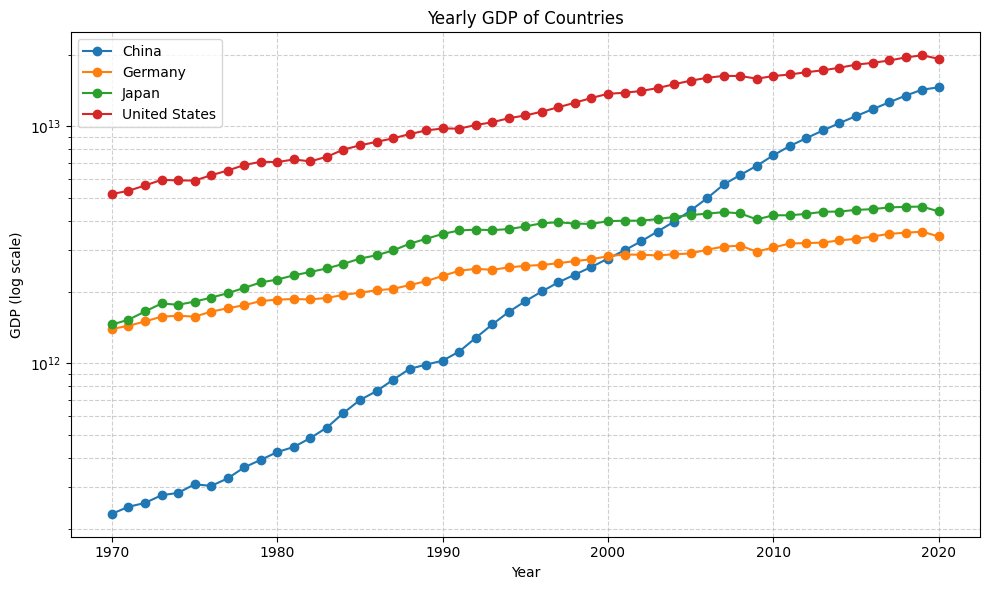

In [15]:
# This is the main program to call the function define above ie plot_yearly_gdp(df_gdp)
plot_yearly_gdp(df_gdp)

## Part 2
Do the same as above but scale each GDP relative to the United States, as a percentage. This will be on a linear scale.

In [26]:
import pandas as pd

# Load the GDP data
df_gdp = pd.read_csv('GDP_2015dollars.csv', index_col=0)

# Create relative GDP columns (e.g., each country's GDP relative to the first year)
for country in df_gdp.columns:
    df_gdp[country + '_rel'] = df_gdp[country] / df_gdp[country].iloc[0]

df_gdp.head()

,China,Germany,Japan,United States,China_rel,Germany_rel,Japan_rel,United States_rel
Year,,,,,,,,
1970,2.320617e+11,1.398222e+12,1.460289e+12,5.183548e+12,1.000000,1.000000,1.000000,1.000000
1971,2.484453e+11,1.442024e+12,1.528908e+12,5.354261e+12,1.070600,1.031327,1.046990,1.032934
1972,2.579111e+11,1.504036e+12,1.657543e+12,5.635836e+12,1.111390,1.075678,1.135079,1.087255
1973,2.779250e+11,1.575891e+12,1.790687e+12,5.954020e+12,1.197634,1.127068,1.226255,1.148638
1974,2.843450e+11,1.589918e+12,1.768747e+12,5.921835e+12,1.225299,1.137100,1.211231,1.142429


In [31]:
import matplotlib.pyplot as plt

def plot_yearly_gdp_relative(df_gdp):
    """
    Plots the time series data for 3 countries' GDP relative to the US, as a percentage, on a linear scale.

    Parameters:
    df_gdp : pandas DataFrame
        Columns include GDP values. Assumes there is a column 'United States' for the reference country.
    """
    plt.figure(figsize=(10, 6))

    # List of countries to compare relative to the US (exclude 'United States')
    countries = [c for c in df_gdp.columns if c != 'United States']

    for country in countries:
        relative_pct = (df_gdp[country] / df_gdp['United States']) * 100
        plt.plot(df_gdp.index, relative_pct, marker='o', label=country + ' (% of US GDP)')

    plt.xlabel('Year')
    plt.ylabel('GDP (% of US)')
    plt.title('Yearly GDP Relative to US (Percentage)')
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

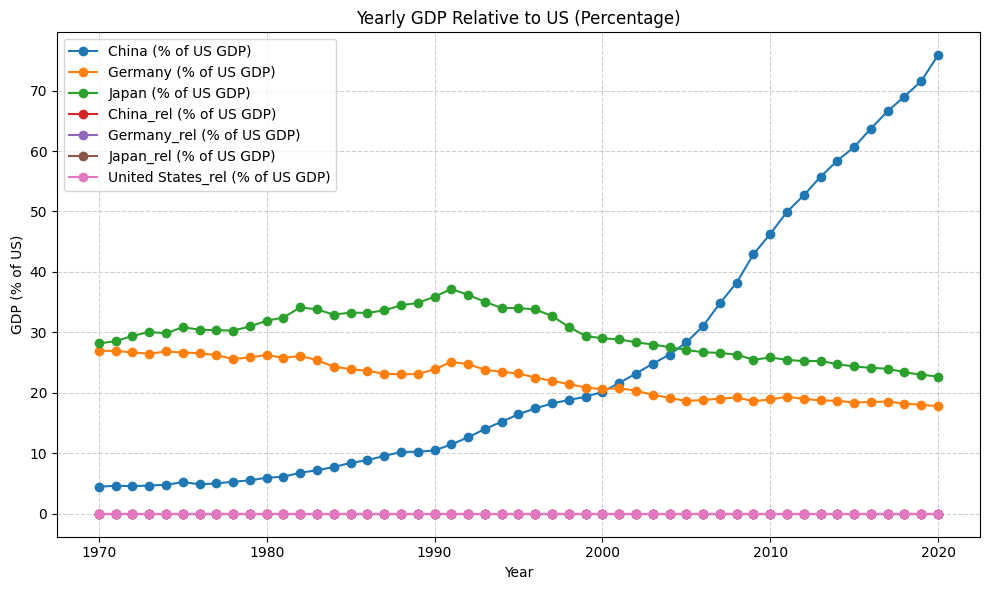

In [32]:
plot_yearly_gdp_relative(df_gdp)

## End of Question 1